# Practice Lab - Advice for Applying Machine Learning
In this lab, you will explore techniques to evaluate and improve your machine learning models.

# Outline
- [ 1 - Packages ](#1)
- [ 2 - Evaluating a Learning Algorithm (Polynomial Regression)](#2)
  - [ 2.1 Splitting your data set](#2.1)
  - [ 2.2 Error calculation for model evaluation, linear regression](#2.2)
    - [ Exercise 1](#ex01)
  - [ 2.3 Compare performance on training and test data](#2.3)
- [ 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> ](#3)
  - [ 3.1 Plot Train, Cross-Validation, Test](#3.1)
  - [ 3.2 Finding the optimal degree](#3.2)
  - [ 3.3 Tuning Regularization.](#3.3)
  - [ 3.4 Getting more data: Increasing Training Set Size (m)](#3.4)
- [ 4 - Evaluating a Learning Algorithm (Neural Network)](#4)
  - [ 4.1 Data Set](#4.1)
  - [ 4.2 Evaluating categorical model by calculating classification error](#4.2)
    - [ Exercise 2](#ex02)
- [ 5 - Model Complexity](#5)
  - [ Exercise 3](#ex03)
  - [ 5.1 Simple model](#5.1)
    - [ Exercise 4](#ex04)
- [ 6 - Regularization](#6)
  - [ Exercise 5](#ex05)
- [ 7 - Iterate to find optimal regularization value](#7)
  - [ 7.1 Test](#7.1)


<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [scikitlearn](https://scikit-learn.org/stable/) is a basic library for data mining
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from public_tests_a1 import * 

tf.keras.backend.set_floatx('float64')
from assigment_utils import *

tf.autograph.set_verbosity(0)

<a name="2"></a>
## 2 - Evaluating a Learning Algorithm (Polynomial Regression)

<img align="Right" src="./images/C2_W3_TrainingVsNew.png"  style=" width:350px; padding: 10px 20px ; "> Let's say you have created a machine learning model and you find it *fits* your training data very well. You're done? Not quite. The goal of creating the model was to be able to predict values for <span style="color:blue">*new* </span> examples. 

How can you test your model's performance on new data before deploying it?   
The answer has two parts:
* Split your original data set into "Training" and "Test" sets. 
    * Use the training data to fit the parameters of the model
    * Use the test data to evaluate the model on *new* data
* Develop an error function to evaluate your model.

<a name="2.1"></a>
### 2.1 Splitting your data set
Lectures advised reserving 20-40% of your data set for testing. Let's use an `sklearn` function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to perform the split. Double-check the shapes after running the following cell.

In [2]:
# Generate some data
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (18,) y.shape (18,)
X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


#### 2.1.1 Plot Train, Test sets
You can see below the data points that will be part of training (in red) are intermixed with those that the model is not trained on (test). This particular data set is a quadratic function with noise added. The "ideal" curve is shown for reference.

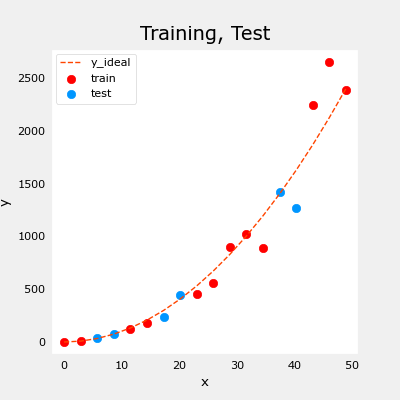

In [3]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="2.2"></a>
### 2.2 Error calculation for model evaluation, linear regression
When *evaluating* a linear regression model, you average the squared error difference of the predicted values and the target values.

$$ J_\text{test}(\mathbf{w},b) = 
            \frac{1}{2m_\text{test}}\sum_{i=0}^{m_\text{test}-1} ( f_{\mathbf{w},b}(\mathbf{x}^{(i)}_\text{test}) - y^{(i)}_\text{test} )^2 
            \tag{1}
$$

<a name="ex01"></a>
### Exercise 1

Below, create a function to evaluate the error on a data set for a linear regression model.

In [4]:
# UNQ_C1
# GRADED CELL: eval_mse
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
    ### START CODE HERE ### 
        err += (yhat[i]-y[i])*(yhat[i]-y[i])/(2*m)
    
    ### END CODE HERE ### 
    
    return(err)

In [5]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
eval_mse(y_hat, y_tmp)

# BEGIN UNIT TEST
test_eval_mse(eval_mse)   
# END UNIT TEST

 All tests passed.


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>

    
```python
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
        err_i  = ( (yhat[i] - y[i])**2 ) 
        err   += err_i                                                                
    err = err / (2*m)                    
    return(err)
``` 

<a name="2.3"></a>
### 2.3 Compare performance on training and test data
Let's build a high degree polynomial model to minimize training error. This will use the linear_regression functions from `sklearn`. The code is in the imported utility file if you would like to see the details. The steps below are:
* create and fit the model. ('fit' is another name for training or running gradient descent).
* compute the error on the training data.
* compute the error on the test data.

In [6]:
# create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

The computed error on the training set is substantially less than that of the test set. 

In [7]:
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 58.01, test err 171215.01


The following plot shows why this is. The model fits the training data very well. To do so, it has created a complex function. The test data was not part of the training and the model does a poor job of predicting on this data.  
This model would be described as 1) is overfitting, 2) has high variance 3) 'generalizes' poorly.

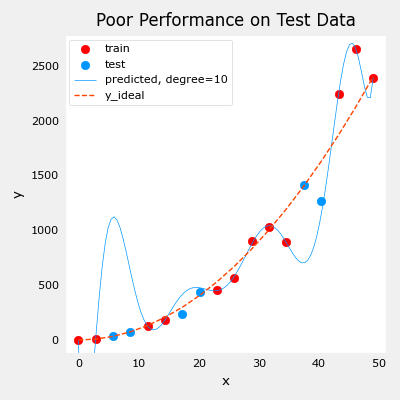

In [8]:
# plot predictions over data range 
x = np.linspace(0,int(X.max()),100)  # predict values for plot
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

The test set error shows this model will not work well on new data. If you use the test error to guide improvements in the model, then the model will perform well on the test data... but the test data was meant to represent *new* data.
You need yet another set of data to test new data performance.

The proposal made during lecture is to separate data into three groups. The distribution of training, cross-validation and test sets shown in the below table is a typical distribution, but can be varied depending on the amount of data available.

| data             | % of total | Description |
|------------------|:----------:|:---------|
| training         | 60         | Data used to tune model parameters $w$ and $b$ in training or fitting |
| cross-validation | 20         | Data used to tune other model parameters like degree of polynomial, regularization or the architecture of a neural network.|
| test             | 20         | Data used to test the model after tuning to gauge performance on new data |


Let's generate three data sets below. We'll once again use `train_test_split` from `sklearn` but will call it twice to get three splits:

In [9]:
# Generate  data
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


<a name="3"></a>
## 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> 
 Above, it was clear the degree of the polynomial model was too high. How can you choose a good value? It turns out, as shown in the diagram, the training and cross-validation performance can provide guidance. By trying a range of degree values, the training and cross-validation performance can be evaluated. As the degree becomes too large, the cross-validation performance will start to degrade relative to the training performance. Let's try this on our example.

<a name="3.1"></a>
### 3.1 Plot Train, Cross-Validation, Test
You can see below the datapoints that will be part of training (in red) are intermixed with those that the model is not trained on (test and cv).

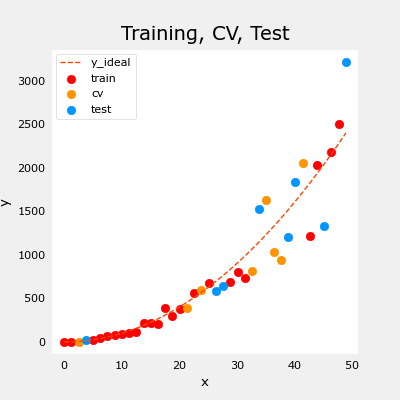

In [10]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_cv, y_cv,       color = dlc["dlorange"], label="cv")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="3.2"></a>
### 3.2 Finding the optimal degree
In previous labs, you found that you could create a model capable of fitting complex curves by utilizing a polynomial (See Course1, Week2 Feature Engineering and Polynomial Regression Lab).  Further, you demonstrated that by increasing the *degree* of the polynomial, you could *create* overfitting. (See Course 1, Week3, Over-Fitting Lab). Let's use that knowledge here to test our ability to tell the difference between over-fitting and under-fitting.

Let's train the model repeatedly, increasing the degree of the polynomial each iteration. Here, we're going to use the [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) linear regression model for speed and simplicity.

In [11]:
max_degree = 9
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(X.max()),100)  
y_pred = np.zeros((100,max_degree))  #columns are lines to plot

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:,degree] = lmodel.predict(x)
    
optimal_degree = np.argmin(err_cv)+1

<font size="4">Let's plot the result:</font>

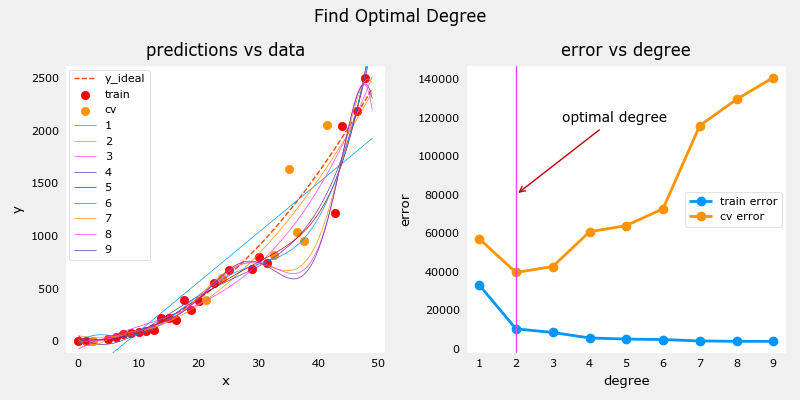

In [12]:
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)

The plot above demonstrates that separating data into two groups, data the model is trained on and data the model has not been trained on, can be used to determine if the model is underfitting or overfitting. In our example, we created a variety of models varying from underfitting to overfitting by increasing the degree of the polynomial used. 
- On the left plot, the solid lines represent the predictions from these models. A polynomial model with degree 1 produces a straight line that intersects very few data points, while the maximum degree hews very closely to every data point. 
- on the right:
    - the error on the trained data (blue) decreases as the model complexity increases as expected
    - the error of the cross-validation data decreases initially as the model starts to conform to the data, but then increases as the model starts to over-fit on the training data (fails to *generalize*).     
    
It's worth noting that the curves in these examples as not as smooth as one might draw for a lecture. It's clear the specific data points assigned to each group can change your results significantly. The general trend is what is important.

<a name="3.3"></a>
### 3.3 Tuning Regularization.
In previous labs, you have utilized *regularization* to reduce overfitting. Similar to degree, one can use the same methodology to tune the regularization parameter lambda ($\lambda$).

Let's demonstrate this by starting with a high degree polynomial and varying the regularization parameter.

In [13]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)    
err_cv = np.zeros(num_steps)       
x = np.linspace(0,int(X.max()),100) 
y_pred = np.zeros((100,num_steps))  #columns are lines to plot

for i in range(num_steps):
    lambda_= lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)
    
optimal_reg_idx = np.argmin(err_cv) 

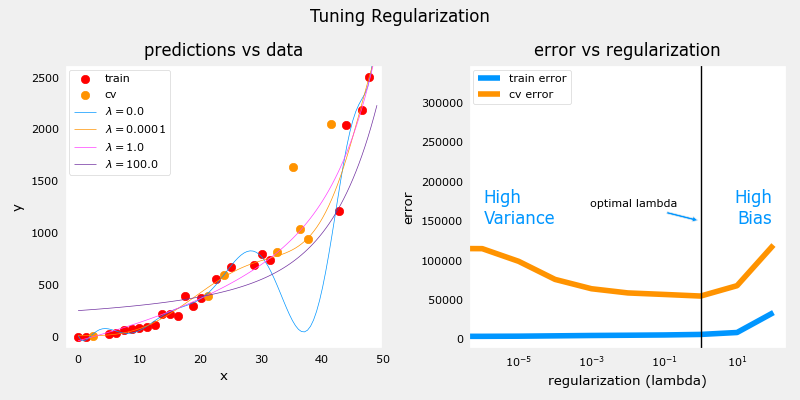

In [14]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

Above, the plots show that as regularization increases, the model moves from a high variance (overfitting) model to a high bias (underfitting) model. The vertical line in the right plot shows the optimal value of lambda. In this example, the polynomial degree was set to 10. 

<a name="3.4"></a>
### 3.4 Getting more data: Increasing Training Set Size (m)
When a model is overfitting (high variance), collecting additional data can improve performance. Let's try that here.

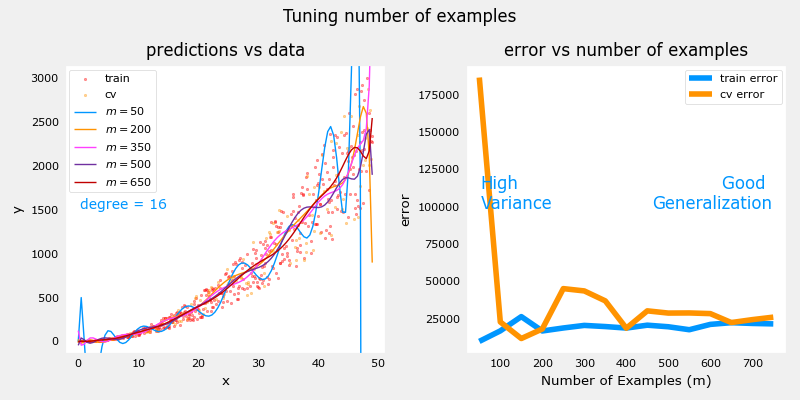

In [15]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

The above plots show that when a model has high variance and is overfitting, adding more examples improves performance. Note the curves on the left plot. The final curve with the highest value of $m$ is a smooth curve that is in the center of the data. On the right, as the number of examples increases, the performance of the training set and cross-validation set converge to similar values. Note that the curves are not as smooth as one might see in a lecture. That is to be expected. The trend remains clear: more data improves generalization. 

> Note that adding more examples when the model has high bias (underfitting) does not improve performance.


<a name="4"></a>
## 4 - Evaluating a Learning Algorithm (Neural Network)
Above, you tuned aspects of a polynomial regression model. Here, you will work with a neural network model. Let's start by creating a classification data set. 

<a name="4.1"></a>
### 4.1 Data Set
Run the cell below to generate a data set and split it into training, cross-validation (CV) and test sets. In this example, we're increasing the percentage of cross-validation data points for emphasis.  

In [16]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs()

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


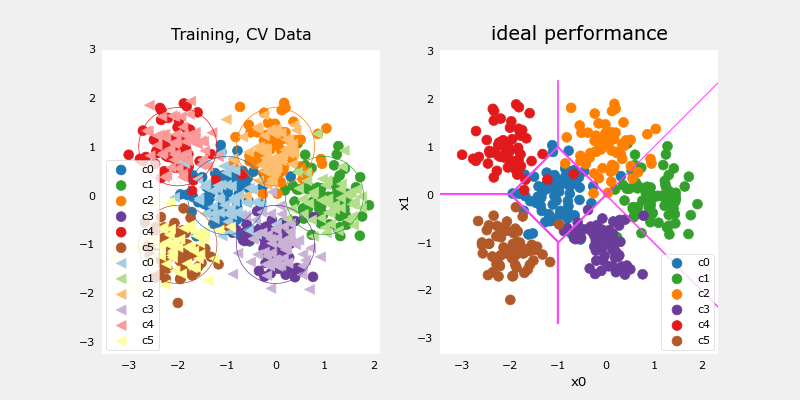

In [17]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

Above, you can see the data on the left. There are six clusters identified by color. Both training points (dots) and cross-validataion points (triangles) are shown. The interesting points are those that fall in ambiguous locations where either cluster might consider them members. What would you expect a neural network model to do? What would be an example of overfitting? underfitting?  
On the right is an example of an 'ideal' model, or a model one might create knowing the source of the data. The lines represent 'equal distance' boundaries where the distance between center points is equal. It's worth noting that this model would "misclassify" roughly 8% of the total data set.

<a name="4.2"></a>
### 4.2 Evaluating categorical model by calculating classification error
The evaluation function for categorical models used here is simply the fraction of incorrect predictions:  
$$ J_{cv} =\frac{1}{m}\sum_{i=0}^{m-1} 
\begin{cases}
    1, & \text{if $\hat{y}^{(i)} \neq y^{(i)}$}\\
    0, & \text{otherwise}
\end{cases}
$$

<a name="ex02"></a>
### Exercise 2

Below, complete the routine to calculate classification error. Note, in this lab, target values are the index of the category and are not [one-hot encoded](https://en.wikipedia.org/wiki/One-hot).

In [19]:
# UNQ_C2
# GRADED CELL: eval_cat_err
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0 
    for i in range(m):
    ### START CODE HERE ### 
        if y[i] != yhat[i]:
            incorrect += 1
    cerr = incorrect/m
    ### END CODE HERE ### 
    
    return(cerr)

In [20]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )

# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST
# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250
 All tests passed.
 All tests passed.


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
```python
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(m):
        if yhat[i] != y[i]:    # @REPLACE
            incorrect += 1     # @REPLACE
    cerr = incorrect/m         # @REPLACE
    return(cerr)                                    
``` 

<a name="5"></a>
## 5 - Model Complexity
Below, you will build two models. A complex model and a simple model. You will evaluate the models to determine if they are likely to overfit or underfit.

###  5.1 Complex model

<a name="ex03"></a>
### Exercise 3
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation
* Dense layer with 40 units, relu activation
* Dense layer with 6 units and a linear activation (not softmax)  
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [21]:
# UNQ_C3
# GRADED CELL: model
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.random.set_seed(1234)
model = Sequential(
    [
        ### START CODE HERE ### 
        Dense(units=120, activation='relu'),
        Dense(units=40, activation='relu'),
        Dense(units=6, activation='linear')
        ### END CODE HERE ### 

    ], name="Complex"
)
model.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    ### END CODE HERE ### 
)

In [22]:
# BEGIN UNIT TEST
model.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 3s 2ms/step - loss: 1.1847
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4410
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3209
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2903
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2853
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2885
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2404
Epoch 8/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2312
Epoch 9/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2301
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1967
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2120
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2047
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 1ms/step - loss: 0.1593
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555
Epoch 103/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1855
Epoch 104/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1547
Epoch 105/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1461
Epoch 106/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1422
Epoch 107/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1453
Epoch 108/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1400
Epoch 109/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1430
Epoch 110/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1346
Epoch 111/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1442
Epoch 112/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1471
Epoch 113/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0882
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1004
Epoch 201/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0863
Epoch 202/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0819
Epoch 203/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0938
Epoch 204/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0720
Epoch 205/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0913
Epoch 206/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0868
Epoch 207/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1116
Epoch 208/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1402
Epoch 209/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1100
Epoch 210/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0965
Epoch 211/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0668
Epoch 298/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0718
Epoch 299/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0624
Epoch 300/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0910
Epoch 301/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0926
Epoch 302/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0901
Epoch 303/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0807
Epoch 304/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0629
Epoch 305/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0718
Epoch 306/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0560
Epoch 307/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0703
Epoch 308/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0636
Epoch 309/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0826
Epoch 396/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0569
Epoch 397/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0564
Epoch 398/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0488
Epoch 399/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0446
Epoch 400/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0518
Epoch 401/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0844
Epoch 402/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0838
Epoch 403/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0577
Epoch 404/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0464
Epoch 405/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0432
Epoch 406/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0396
Epoch 407/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0295
Epoch 494/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0286
Epoch 495/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0262
Epoch 496/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0256
Epoch 497/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0266
Epoch 498/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 499/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0282
Epoch 500/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0267
Epoch 501/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0314
Epoch 502/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0319
Epoch 503/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0307
Epoch 504/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0480
Epoch 505/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0670
Epoch 592/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1144
Epoch 593/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1871
Epoch 594/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1480
Epoch 595/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1806
Epoch 596/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1247
Epoch 597/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1793
Epoch 598/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1604
Epoch 599/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1233
Epoch 600/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0919
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0713
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0503
Epoch 603/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0468
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0354
Epoch 691/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 692/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0229
Epoch 693/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0234
Epoch 694/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0229
Epoch 695/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0246
Epoch 696/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0215
Epoch 697/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0251
Epoch 698/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0198
Epoch 699/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 700/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0194
Epoch 701/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0186
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0196
Epoch 789/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 790/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0206
Epoch 791/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0216
Epoch 792/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0222
Epoch 793/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 794/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0180
Epoch 795/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0183
Epoch 796/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0180
Epoch 797/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0192
Epoch 798/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0192
Epoch 799/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0307
Epoch 886/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0299
Epoch 887/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0318
Epoch 888/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 889/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 890/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0266
Epoch 891/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0250
Epoch 892/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0258
Epoch 893/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0262
Epoch 894/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 895/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0247
Epoch 896/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 897/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0224
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0232
Epoch 985/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0240
Epoch 986/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 987/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0223
Epoch 988/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0224
Epoch 989/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0235
Epoch 990/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0245
Epoch 991/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0247
Epoch 992/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0245
Epoch 993/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0237
Epoch 994/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0230
Epoch 995/1000
13/1

In [23]:
# BEGIN UNIT TEST
model.summary()

model_test(model, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "Complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               360       
                                                                 
 dense_1 (Dense)             (None, 40)                4840      
                                                                 
 dense_2 (Dense)             (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
All tests passed!


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Complex"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(120, activation = 'relu', name = "L1"),      
        Dense(40, activation = 'relu', name = "L2"),         
        Dense(classes, activation = 'linear', name = "L3")  
    ], name="Complex"
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),          
    optimizer=tf.keras.optimizers.Adam(0.01),   
)

model.fit(
    X_train,y_train,
    epochs=1000
)                                  
``` 

1082/1082 [==============================] - 1s 828us/step


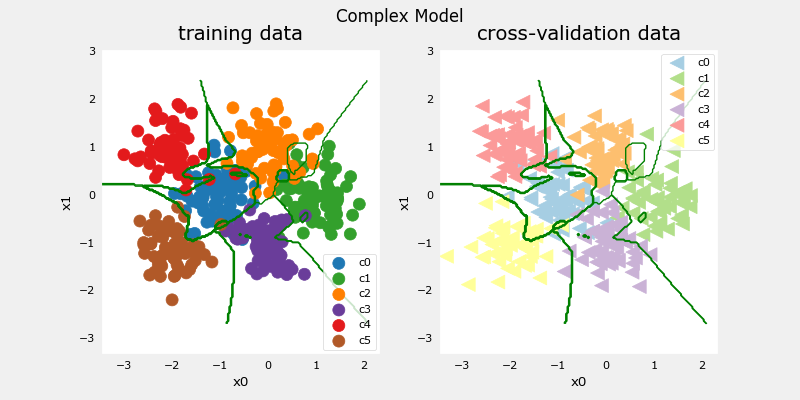

In [24]:
#make a model for plotting routines to call
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

This model has worked very hard to capture outliers of each category. As a result, it has miscategorized some of the cross-validation data. Let's calculate the classification error.

In [25]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 1ms/step
categorization error, training, complex model: 0.013
categorization error, cv,       complex model: 0.119


<a name="5.1"></a>
### 5.1 Simple model
Now, let's try a simple model

<a name="ex04"></a>
### Exercise 4

Below, compose a two-layer model:
* Dense layer with 6 units, relu activation
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [26]:
# UNQ_C4
# GRADED CELL: model_s

tf.random.set_seed(1234)
model_s = Sequential(
    [
        ### START CODE HERE ### 
        Dense(units=6, activation='relu'),
        Dense(units=6, activation='linear')
        ### END CODE HERE ### 
    ], name = "Simple"
)
model_s.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    ### START CODE HERE ### 
)


In [27]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# BEGIN UNIT TEST
model_s.fit(
    X_train,y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.7451
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.5236
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.3461
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.1645
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9718
Epoch 6/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.7874
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6513
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5447
Epoch 9/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4710
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4193
Epoch 11/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3814
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3561
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 1ms/step - loss: 0.1955
Epoch 102/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1958
Epoch 103/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1961
Epoch 104/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1924
Epoch 105/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1918
Epoch 106/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1917
Epoch 107/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1909
Epoch 108/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1913
Epoch 109/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1928
Epoch 110/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1927
Epoch 111/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1909
Epoch 112/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1923
Epoch 113/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1910
Epoch 200/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1880
Epoch 201/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1883
Epoch 202/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1866
Epoch 203/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1874
Epoch 204/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1881
Epoch 205/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1871
Epoch 206/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1904
Epoch 207/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1868
Epoch 208/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1910
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1873
Epoch 210/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1889
Epoch 211/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1898
Epoch 298/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1875
Epoch 299/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1864
Epoch 300/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1875
Epoch 301/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1863
Epoch 302/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1916
Epoch 303/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1853
Epoch 304/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1916
Epoch 305/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1873
Epoch 306/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1856
Epoch 307/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1862
Epoch 308/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1868
Epoch 309/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1837
Epoch 396/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1867
Epoch 397/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1884
Epoch 398/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1852
Epoch 399/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1843
Epoch 400/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1852
Epoch 401/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1842
Epoch 402/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1851
Epoch 403/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1832
Epoch 404/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1853
Epoch 405/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1826
Epoch 406/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1840
Epoch 407/1000
13/1

13/13 [==============================] - 0s 989us/step - loss: 0.1840
Epoch 494/1000
13/13 [==============================] - 0s 996us/step - loss: 0.1827
Epoch 495/1000
13/13 [==============================] - 0s 994us/step - loss: 0.1824
Epoch 496/1000
13/13 [==============================] - 0s 996us/step - loss: 0.1865
Epoch 497/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1821
Epoch 498/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1834
Epoch 499/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1824
Epoch 500/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1824
Epoch 501/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1869
Epoch 502/1000
13/13 [==============================] - 0s 997us/step - loss: 0.1834
Epoch 503/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1830
Epoch 504/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1822
Epoch 505

13/13 [==============================] - 0s 1ms/step - loss: 0.1841
Epoch 592/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1832
Epoch 593/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1831
Epoch 594/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1818
Epoch 595/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1835
Epoch 596/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1816
Epoch 597/1000
13/13 [==============================] - 0s 986us/step - loss: 0.1832
Epoch 598/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1815
Epoch 599/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1805
Epoch 600/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1835
Epoch 601/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1812
Epoch 602/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1835
Epoch 603/1000
13

13/13 [==============================] - 0s 1ms/step - loss: 0.1811
Epoch 690/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1805
Epoch 691/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1816
Epoch 692/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1824
Epoch 693/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1823
Epoch 694/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1805
Epoch 695/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1800
Epoch 696/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1804
Epoch 697/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1821
Epoch 698/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1806
Epoch 699/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1814
Epoch 700/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1823
Epoch 701/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1821
Epoch 788/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1794
Epoch 789/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1803
Epoch 790/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1833
Epoch 791/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1794
Epoch 792/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1801
Epoch 793/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1830
Epoch 794/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1839
Epoch 795/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1796
Epoch 796/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1830
Epoch 797/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1812
Epoch 798/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1813
Epoch 799/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1805
Epoch 886/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1797
Epoch 887/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1825
Epoch 888/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1809
Epoch 889/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1798
Epoch 890/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1820
Epoch 891/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1802
Epoch 892/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1805
Epoch 893/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1801
Epoch 894/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1813
Epoch 895/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1801
Epoch 896/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1803
Epoch 897/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1824
Epoch 984/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1792
Epoch 985/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1786
Epoch 986/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1810
Epoch 987/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1793
Epoch 988/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1811
Epoch 989/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1815
Epoch 990/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1797
Epoch 991/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1797
Epoch 992/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1805
Epoch 993/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1799
Epoch 994/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1786
Epoch 995/1000
13/1

In [28]:
# BEGIN UNIT TEST
model_s.summary()

model_s_test(model_s, classes, X_train.shape[1])
# END UNIT TEST

Model: "Simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 18        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
All tests passed!


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Simple"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 6)                 18        
_________________________________________________________________
L2 (Dense)                   (None, 6)                 42        
=================================================================
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model_s = Sequential(
    [
        Dense(6, activation = 'relu', name="L1"),            # @REPLACE
        Dense(classes, activation = 'linear', name="L2")     # @REPLACE
    ], name = "Simple"
)
model_s.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),     # @REPLACE
    optimizer=tf.keras.optimizers.Adam(0.01),     # @REPLACE
)

model_s.fit(
    X_train,y_train,
    epochs=1000
)                                   
``` 

1082/1082 [==============================] - 1s 725us/step


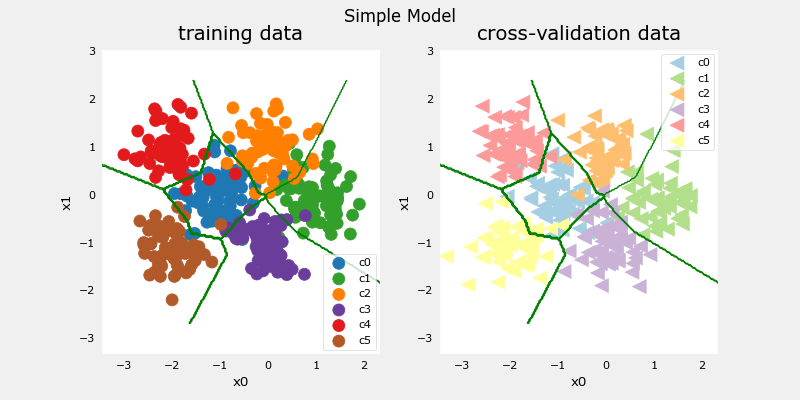

In [29]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Simple Model")

This simple models does pretty well. Let's calculate the classification error.

In [30]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

10/10 [==============================] - 0s 1ms/step
categorization error, training, simple model, 0.068, complex model: 0.013
categorization error, cv,       simple model, 0.066, complex model: 0.119


Our simple model has a little higher classification error on training data but does better on cross-validation data than the more complex model.

<a name="6"></a>
## 6 - Regularization
As in the case of polynomial regression, one can apply regularization to moderate the impact of a more complex model. Let's try this below.

<a name="ex05"></a>
### Exercise 5

Reconstruct your complex model, but this time include regularization.
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 40 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [31]:
# UNQ_C5
# GRADED CELL: model_r

tf.random.set_seed(1234)
model_r = Sequential(
    [
        ### START CODE HERE ### 
        Dense(units=120, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(units=40, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(units=6, activation='linear')
        ### START CODE HERE ### 
    ], name= None
)
model_r.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    ### START CODE HERE ### 
)


In [32]:
# BEGIN UNIT TEST
model_r.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 4.5395
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.6975
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.3289
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.0734
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9911
Epoch 6/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9672
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9162
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8741
Epoch 9/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.8160
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7780
Epoch 11/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.7592
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7576
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 2ms/step - loss: 0.4788
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4634
Epoch 103/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4666
Epoch 104/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4598
Epoch 105/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4947
Epoch 106/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4471
Epoch 107/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4637
Epoch 108/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4734
Epoch 109/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4644
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4554
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4563
Epoch 112/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4464
Epoch 113/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.4060
Epoch 200/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4080
Epoch 201/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4310
Epoch 202/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4000
Epoch 203/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4035
Epoch 204/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4090
Epoch 205/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4529
Epoch 206/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4304
Epoch 207/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4145
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4278
Epoch 209/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4362
Epoch 210/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4167
Epoch 211/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3941
Epoch 298/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4016
Epoch 299/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3993
Epoch 300/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4273
Epoch 301/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4000
Epoch 302/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3963
Epoch 303/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3991
Epoch 304/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3820
Epoch 305/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3794
Epoch 306/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3917
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3920
Epoch 308/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3914
Epoch 309/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3930
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3859
Epoch 397/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3979
Epoch 398/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3897
Epoch 399/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3873
Epoch 400/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3808
Epoch 401/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3597
Epoch 402/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3642
Epoch 403/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3647
Epoch 404/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3639
Epoch 405/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3567
Epoch 406/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3606
Epoch 407/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3513
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3520
Epoch 495/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3510
Epoch 496/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3720
Epoch 497/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3975
Epoch 498/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3498
Epoch 499/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3428
Epoch 500/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3622
Epoch 501/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3522
Epoch 502/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3566
Epoch 503/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3866
Epoch 504/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3742
Epoch 505/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3471
Epoch 592/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3452
Epoch 593/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3404
Epoch 594/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3399
Epoch 595/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4194
Epoch 596/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3980
Epoch 597/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3570
Epoch 598/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3454
Epoch 599/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3381
Epoch 600/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3522
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3337
Epoch 602/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3442
Epoch 603/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3905
Epoch 690/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3617
Epoch 691/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3418
Epoch 692/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3429
Epoch 693/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3409
Epoch 694/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3376
Epoch 695/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3339
Epoch 696/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3326
Epoch 697/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3303
Epoch 698/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3460
Epoch 699/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3394
Epoch 700/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3476
Epoch 701/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3341
Epoch 788/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3310
Epoch 789/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3384
Epoch 790/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3349
Epoch 791/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3713
Epoch 792/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3711
Epoch 793/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3464
Epoch 794/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3506
Epoch 795/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3482
Epoch 796/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3718
Epoch 797/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3255
Epoch 798/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3648
Epoch 799/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3590
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3512
Epoch 887/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3338
Epoch 888/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3375
Epoch 889/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3352
Epoch 890/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3689
Epoch 891/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3292
Epoch 892/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3306
Epoch 893/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3343
Epoch 894/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3429
Epoch 895/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3861
Epoch 896/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3596
Epoch 897/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3160
Epoch 984/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3289
Epoch 985/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3437
Epoch 986/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3446
Epoch 987/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3419
Epoch 988/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3322
Epoch 989/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3363
Epoch 990/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3425
Epoch 991/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3496
Epoch 992/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3527
Epoch 993/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3287
Epoch 994/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3242
Epoch 995/1000
13/1

In [33]:
# BEGIN UNIT TEST
model_r.summary()

model_r_test(model_r, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 120)               360       
                                                                 
 dense_6 (Dense)             (None, 40)                4840      
                                                                 
 dense_7 (Dense)             (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
ddd
All tests passed!


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "ComplexRegularized"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model_r = Sequential(
    [
        Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L1"), 
        Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L2"),  
        Dense(classes, activation = 'linear', name="L3")  
    ], name="ComplexRegularized"
)
model_r.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=tf.keras.optimizers.Adam(0.01),                             
)

model_r.fit(
    X_train,y_train,
    epochs=1000
)                                   
``` 

1082/1082 [==============================] - 1s 930us/step


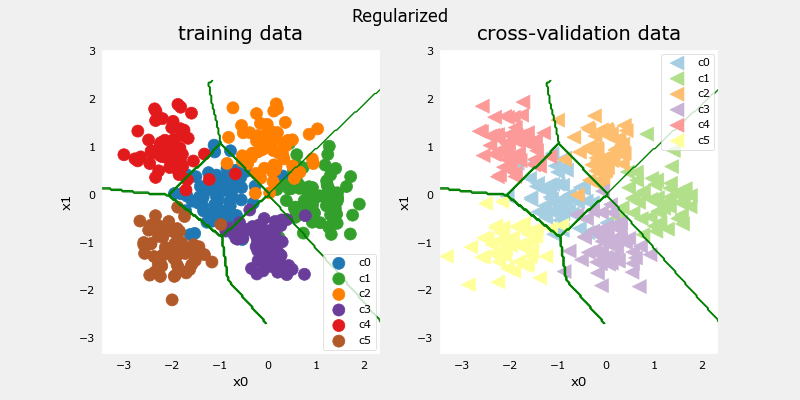

In [34]:
#make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

The results look very similar to the 'ideal' model. Let's check classification error.

In [35]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

3/3 [==============================] - 0s 1ms/step
categorization error, training, regularized: 0.072, simple model, 0.068, complex model: 0.013
categorization error, cv,       regularized: 0.072, simple model, 0.066, complex model: 0.119


The simple model is a bit better in the training set than the regularized model but it worse in the cross validation set.

<a name="7"></a>
## 7 - Iterate to find optimal regularization value
As you did in linear regression, you can try many regularization values. This code takes several minutes to run. If you have time, you can run it and check the results. If not, you have completed the graded parts of the assignment!

In [36]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")


Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 1.1179
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3898
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3019
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2575
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2595
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2853
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2405
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2236
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2236
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1975
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2140
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2031
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 2ms/step - loss: 0.1711
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1632
Epoch 103/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1745
Epoch 104/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1529
Epoch 105/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1505
Epoch 106/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1445
Epoch 107/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1526
Epoch 108/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1439
Epoch 109/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1378
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1420
Epoch 111/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1438
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1574
Epoch 113/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1043
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1037
Epoch 201/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0963
Epoch 202/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0987
Epoch 203/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0858
Epoch 204/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0908
Epoch 205/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0962
Epoch 206/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1068
Epoch 207/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1308
Epoch 208/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1280
Epoch 209/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1269
Epoch 210/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1148
Epoch 211/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0686
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0637
Epoch 299/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0643
Epoch 300/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0642
Epoch 301/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0645
Epoch 302/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0885
Epoch 303/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0924
Epoch 304/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0704
Epoch 305/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0672
Epoch 306/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0731
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0676
Epoch 308/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0574
Epoch 309/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0620
Epoch 396/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0680
Epoch 397/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0763
Epoch 398/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1026
Epoch 399/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1025
Epoch 400/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0837
Epoch 401/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0670
Epoch 402/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0529
Epoch 403/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0588
Epoch 404/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0461
Epoch 405/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0468
Epoch 406/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0435
Epoch 407/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0538
Epoch 494/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0603
Epoch 495/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0579
Epoch 496/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0440
Epoch 497/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0434
Epoch 498/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0415
Epoch 499/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0375
Epoch 500/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0389
Epoch 501/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0411
Epoch 502/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0376
Epoch 503/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0302
Epoch 504/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0312
Epoch 505/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0952
Epoch 592/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1069
Epoch 593/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0931
Epoch 594/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1988
Epoch 595/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3436
Epoch 596/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3031
Epoch 597/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1906
Epoch 598/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1389
Epoch 599/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1713
Epoch 600/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1291
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0893
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0898
Epoch 603/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0719
Epoch 691/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0450
Epoch 692/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0551
Epoch 693/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0877
Epoch 694/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0917
Epoch 695/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0550
Epoch 696/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0541
Epoch 697/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0417
Epoch 698/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0392
Epoch 699/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0351
Epoch 700/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0336
Epoch 701/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0892
Epoch 788/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0756
Epoch 789/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0629
Epoch 790/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0521
Epoch 791/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0554
Epoch 792/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0435
Epoch 793/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0357
Epoch 794/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0364
Epoch 795/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0300
Epoch 796/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0373
Epoch 797/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0326
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 799/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0370
Epoch 886/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0380
Epoch 887/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0350
Epoch 888/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0289
Epoch 889/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0337
Epoch 890/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0285
Epoch 891/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0276
Epoch 892/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0266
Epoch 893/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0261
Epoch 894/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0266
Epoch 895/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0249
Epoch 896/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0280
Epoch 897/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0297
Epoch 984/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0253
Epoch 985/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0234
Epoch 986/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0257
Epoch 987/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0286
Epoch 988/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0444
Epoch 989/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0781
Epoch 990/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0489
Epoch 991/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0789
Epoch 992/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1340
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1340
Epoch 994/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1054
Epoch 995/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.2354
Epoch 83/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2288
Epoch 84/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2323
Epoch 85/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2462
Epoch 86/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2235
Epoch 87/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2252
Epoch 88/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2290
Epoch 89/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2248
Epoch 90/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2221
Epoch 91/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2173
Epoch 92/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2146
Epoch 93/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2164
Epoch 94/1000
13/13 [=========

13/13 [==============================] - 0s 1ms/step - loss: 0.2185
Epoch 182/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2104
Epoch 183/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2112
Epoch 184/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2014
Epoch 185/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2036
Epoch 186/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1962
Epoch 187/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2020
Epoch 188/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2001
Epoch 189/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2008
Epoch 190/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2055
Epoch 191/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2097
Epoch 192/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2071
Epoch 193/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1973
Epoch 280/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1971
Epoch 281/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2025
Epoch 282/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1922
Epoch 283/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2060
Epoch 284/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1934
Epoch 285/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1833
Epoch 286/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1871
Epoch 287/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1923
Epoch 288/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2178
Epoch 289/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1918
Epoch 290/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2019
Epoch 291/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1794
Epoch 378/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1833
Epoch 379/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1888
Epoch 380/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1957
Epoch 381/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1870
Epoch 382/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1933
Epoch 383/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1983
Epoch 384/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1982
Epoch 385/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1883
Epoch 386/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1831
Epoch 387/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1847
Epoch 388/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1917
Epoch 389/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2081
Epoch 476/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1915
Epoch 477/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1942
Epoch 478/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1910
Epoch 479/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1776
Epoch 480/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1731
Epoch 481/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1714
Epoch 482/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1728
Epoch 483/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1777
Epoch 484/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1970
Epoch 485/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1754
Epoch 486/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1742
Epoch 487/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1809
Epoch 574/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1746
Epoch 575/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1684
Epoch 576/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1677
Epoch 577/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1742
Epoch 578/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1787
Epoch 579/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1683
Epoch 580/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1714
Epoch 581/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1685
Epoch 582/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1613
Epoch 583/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1675
Epoch 584/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1737
Epoch 585/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1589
Epoch 672/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1739
Epoch 673/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1724
Epoch 674/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1843
Epoch 675/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1674
Epoch 676/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1666
Epoch 677/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1619
Epoch 678/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1664
Epoch 679/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1763
Epoch 680/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1742
Epoch 681/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1724
Epoch 682/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1716
Epoch 683/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1552
Epoch 770/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1606
Epoch 771/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1696
Epoch 772/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1688
Epoch 773/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1702
Epoch 774/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1645
Epoch 775/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1690
Epoch 776/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1472
Epoch 777/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1635
Epoch 778/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1599
Epoch 779/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1646
Epoch 780/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1600
Epoch 781/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1505
Epoch 868/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1523
Epoch 869/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1569
Epoch 870/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1715
Epoch 871/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1591
Epoch 872/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1528
Epoch 873/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1518
Epoch 874/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1449
Epoch 875/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1569
Epoch 876/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1564
Epoch 877/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1535
Epoch 878/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1572
Epoch 879/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1536
Epoch 966/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1559
Epoch 967/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1682
Epoch 968/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1955
Epoch 969/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1657
Epoch 970/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1578
Epoch 971/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1561
Epoch 972/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1492
Epoch 973/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1489
Epoch 974/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1552
Epoch 975/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1488
Epoch 976/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1441
Epoch 977/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3565
Epoch 65/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3686
Epoch 66/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3382
Epoch 67/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3563
Epoch 68/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3494
Epoch 69/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3173
Epoch 70/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3108
Epoch 71/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3156
Epoch 72/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2964
Epoch 73/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3099
Epoch 74/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3066
Epoch 75/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3201
Epoch 76/1000
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 0.2791
Epoch 164/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2914
Epoch 165/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2882
Epoch 166/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2771
Epoch 167/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2796
Epoch 168/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2770
Epoch 169/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2777
Epoch 170/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2803
Epoch 171/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2643
Epoch 172/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2604
Epoch 173/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2801
Epoch 174/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2919
Epoch 175/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.2753
Epoch 262/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2641
Epoch 263/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2554
Epoch 264/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2519
Epoch 265/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2708
Epoch 266/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2719
Epoch 267/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2711
Epoch 268/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2564
Epoch 269/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2518
Epoch 270/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2637
Epoch 271/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2541
Epoch 272/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2586
Epoch 273/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2463
Epoch 360/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2591
Epoch 361/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2626
Epoch 362/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2920
Epoch 363/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2860
Epoch 364/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2681
Epoch 365/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2538
Epoch 366/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2505
Epoch 367/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2748
Epoch 368/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2795
Epoch 369/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2615
Epoch 370/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2509
Epoch 371/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2316
Epoch 458/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2511
Epoch 459/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2446
Epoch 460/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2389
Epoch 461/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2685
Epoch 462/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2386
Epoch 463/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2339
Epoch 464/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2413
Epoch 465/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2568
Epoch 466/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2588
Epoch 467/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2469
Epoch 468/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2516
Epoch 469/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.2418
Epoch 556/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2279
Epoch 557/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2336
Epoch 558/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2401
Epoch 559/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2571
Epoch 560/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2494
Epoch 561/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2338
Epoch 562/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2528
Epoch 563/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2296
Epoch 564/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2349
Epoch 565/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2367
Epoch 566/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2344
Epoch 567/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.2214
Epoch 654/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2397
Epoch 655/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2293
Epoch 656/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2266
Epoch 657/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2270
Epoch 658/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2323
Epoch 659/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2267
Epoch 660/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2404
Epoch 661/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2284
Epoch 662/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2365
Epoch 663/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2328
Epoch 664/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2592
Epoch 665/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2288
Epoch 752/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2409
Epoch 753/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2199
Epoch 754/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2332
Epoch 755/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2277
Epoch 756/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2288
Epoch 757/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2320
Epoch 758/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2238
Epoch 759/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2246
Epoch 760/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2355
Epoch 761/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2403
Epoch 762/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2330
Epoch 763/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2233
Epoch 850/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2258
Epoch 851/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2319
Epoch 852/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2461
Epoch 853/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2297
Epoch 854/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2391
Epoch 855/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2379
Epoch 856/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2214
Epoch 857/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2313
Epoch 858/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2282
Epoch 859/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2386
Epoch 860/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2259
Epoch 861/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2335
Epoch 948/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2394
Epoch 949/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2247
Epoch 950/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2205
Epoch 951/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2201
Epoch 952/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2383
Epoch 953/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2260
Epoch 954/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2336
Epoch 955/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2226
Epoch 956/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2258
Epoch 957/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2321
Epoch 958/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2423
Epoch 959/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4553
Epoch 47/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4334
Epoch 48/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4793
Epoch 49/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4674
Epoch 50/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4353
Epoch 51/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4506
Epoch 52/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4420
Epoch 53/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4547
Epoch 54/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4318
Epoch 55/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4589
Epoch 56/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4269
Epoch 57/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4417
Epoch 58/1000
13/13 [=========

13/13 [==============================] - 0s 1ms/step - loss: 0.3639
Epoch 146/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3601
Epoch 147/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3869
Epoch 148/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3670
Epoch 149/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3602
Epoch 150/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3604
Epoch 151/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3599
Epoch 152/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3540
Epoch 153/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3787
Epoch 154/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3610
Epoch 155/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3634
Epoch 156/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3660
Epoch 157/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3346
Epoch 244/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3443
Epoch 245/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3405
Epoch 246/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3365
Epoch 247/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3296
Epoch 248/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3448
Epoch 249/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3539
Epoch 250/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3425
Epoch 251/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3689
Epoch 252/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3409
Epoch 253/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3368
Epoch 254/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3595
Epoch 255/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3277
Epoch 342/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3404
Epoch 343/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3252
Epoch 344/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3194
Epoch 345/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3194
Epoch 346/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3286
Epoch 347/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3285
Epoch 348/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3342
Epoch 349/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3096
Epoch 350/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3318
Epoch 351/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3167
Epoch 352/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3394
Epoch 353/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3112
Epoch 440/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3066
Epoch 441/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3150
Epoch 442/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3226
Epoch 443/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3169
Epoch 444/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3093
Epoch 445/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3209
Epoch 446/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3149
Epoch 447/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3453
Epoch 448/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3324
Epoch 449/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3074
Epoch 450/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3075
Epoch 451/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3642
Epoch 538/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3251
Epoch 539/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2956
Epoch 540/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3140
Epoch 541/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3290
Epoch 542/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3330
Epoch 543/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3243
Epoch 544/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3143
Epoch 545/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3057
Epoch 546/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3177
Epoch 547/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3355
Epoch 548/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3115
Epoch 549/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3264
Epoch 636/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3103
Epoch 637/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3053
Epoch 638/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2964
Epoch 639/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2949
Epoch 640/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2959
Epoch 641/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2919
Epoch 642/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3152
Epoch 643/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3273
Epoch 644/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3019
Epoch 645/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3166
Epoch 646/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3243
Epoch 647/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3008
Epoch 734/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3222
Epoch 735/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3173
Epoch 736/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3172
Epoch 737/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3335
Epoch 738/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2918
Epoch 739/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3053
Epoch 740/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3100
Epoch 741/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3257
Epoch 742/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3505
Epoch 743/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3011
Epoch 744/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2954
Epoch 745/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3074
Epoch 832/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3222
Epoch 833/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3291
Epoch 834/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3099
Epoch 835/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2970
Epoch 836/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2862
Epoch 837/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2978
Epoch 838/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3051
Epoch 839/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2940
Epoch 840/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3016
Epoch 841/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2885
Epoch 842/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3080
Epoch 843/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3120
Epoch 930/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3258
Epoch 931/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3079
Epoch 932/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3003
Epoch 933/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3038
Epoch 934/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3324
Epoch 935/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3001
Epoch 936/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2921
Epoch 937/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2872
Epoch 938/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3088
Epoch 939/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2889
Epoch 940/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2906
Epoch 941/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.6096
Epoch 29/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5993
Epoch 30/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6222
Epoch 31/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6140
Epoch 32/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6216
Epoch 33/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6126
Epoch 34/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6477
Epoch 35/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6442
Epoch 36/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6131
Epoch 37/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5828
Epoch 38/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5663
Epoch 39/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5646
Epoch 40/1000
13/13 [=========

13/13 [==============================] - 0s 1ms/step - loss: 0.4462
Epoch 128/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4338
Epoch 129/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4413
Epoch 130/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4385
Epoch 131/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4705
Epoch 132/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4378
Epoch 133/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4254
Epoch 134/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4500
Epoch 135/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4458
Epoch 136/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4522
Epoch 137/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4307
Epoch 138/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4493
Epoch 139/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4319
Epoch 226/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4182
Epoch 227/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4340
Epoch 228/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3884
Epoch 229/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4007
Epoch 230/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4067
Epoch 231/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3990
Epoch 232/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4103
Epoch 233/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3886
Epoch 234/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3842
Epoch 235/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3878
Epoch 236/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3947
Epoch 237/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4008
Epoch 324/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4009
Epoch 325/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3928
Epoch 326/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3812
Epoch 327/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3728
Epoch 328/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3927
Epoch 329/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3747
Epoch 330/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3624
Epoch 331/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3660
Epoch 332/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3684
Epoch 333/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4072
Epoch 334/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3891
Epoch 335/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3755
Epoch 422/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3902
Epoch 423/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3700
Epoch 424/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3712
Epoch 425/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3578
Epoch 426/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3559
Epoch 427/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3588
Epoch 428/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3656
Epoch 429/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3649
Epoch 430/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3597
Epoch 431/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3470
Epoch 432/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3556
Epoch 433/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3605
Epoch 520/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3636
Epoch 521/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3412
Epoch 522/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3585
Epoch 523/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3700
Epoch 524/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3351
Epoch 525/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3458
Epoch 526/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3502
Epoch 527/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3345
Epoch 528/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3405
Epoch 529/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3716
Epoch 530/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3599
Epoch 531/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3226
Epoch 618/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3613
Epoch 619/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3850
Epoch 620/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3834
Epoch 621/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3424
Epoch 622/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3422
Epoch 623/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3348
Epoch 624/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3251
Epoch 625/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3239
Epoch 626/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3361
Epoch 627/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3476
Epoch 628/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3886
Epoch 629/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3271
Epoch 716/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3331
Epoch 717/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3464
Epoch 718/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3695
Epoch 719/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4168
Epoch 720/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3972
Epoch 721/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3635
Epoch 722/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3430
Epoch 723/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3666
Epoch 724/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3399
Epoch 725/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3477
Epoch 726/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3426
Epoch 727/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3221
Epoch 814/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3393
Epoch 815/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3584
Epoch 816/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3569
Epoch 817/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3565
Epoch 818/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3469
Epoch 819/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3350
Epoch 820/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3685
Epoch 821/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3974
Epoch 822/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3433
Epoch 823/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3374
Epoch 824/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3446
Epoch 825/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3224
Epoch 912/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3247
Epoch 913/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3148
Epoch 914/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3460
Epoch 915/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3396
Epoch 916/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3448
Epoch 917/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3380
Epoch 918/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3333
Epoch 919/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3529
Epoch 920/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3568
Epoch 921/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3354
Epoch 922/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3466
Epoch 923/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 1.1335
Epoch 10/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.1066
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.0539
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.0227
Epoch 13/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.0071
Epoch 14/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9921
Epoch 15/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9497
Epoch 16/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9422
Epoch 17/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9459
Epoch 18/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9386
Epoch 19/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9093
Epoch 20/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.8907
Epoch 21/1000
13/13 [=========

Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5922
Epoch 110/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5895
Epoch 111/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5864
Epoch 112/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5780
Epoch 113/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5762
Epoch 114/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5732
Epoch 115/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5689
Epoch 116/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5751
Epoch 117/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6013
Epoch 118/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5904
Epoch 119/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5758
Epoch 120/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5828
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.5161
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5309
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5340
Epoch 210/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5099
Epoch 211/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5174
Epoch 212/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4946
Epoch 213/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4930
Epoch 214/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4998
Epoch 215/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5021
Epoch 216/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5073
Epoch 217/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4999
Epoch 218/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5102
Epoch 219/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4616
Epoch 306/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4740
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4697
Epoch 308/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4674
Epoch 309/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4725
Epoch 310/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4511
Epoch 311/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4531
Epoch 312/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4529
Epoch 313/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4585
Epoch 314/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4608
Epoch 315/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4588
Epoch 316/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4508
Epoch 317/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4415
Epoch 404/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4412
Epoch 405/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4266
Epoch 406/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4281
Epoch 407/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4396
Epoch 408/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4394
Epoch 409/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4426
Epoch 410/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4544
Epoch 411/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4625
Epoch 412/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4357
Epoch 413/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4433
Epoch 414/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4398
Epoch 415/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.4145
Epoch 502/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4213
Epoch 503/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4465
Epoch 504/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4651
Epoch 505/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4576
Epoch 506/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4568
Epoch 507/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4321
Epoch 508/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4086
Epoch 509/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4178
Epoch 510/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4151
Epoch 511/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4195
Epoch 512/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4227
Epoch 513/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3980
Epoch 600/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4057
Epoch 601/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3953
Epoch 602/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4082
Epoch 603/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4024
Epoch 604/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3989
Epoch 605/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3992
Epoch 606/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4209
Epoch 607/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4112
Epoch 608/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4164
Epoch 609/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4114
Epoch 610/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4350
Epoch 611/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3897
Epoch 698/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4064
Epoch 699/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3951
Epoch 700/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3977
Epoch 701/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4032
Epoch 702/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3857
Epoch 703/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3792
Epoch 704/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4016
Epoch 705/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4127
Epoch 706/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3941
Epoch 707/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4070
Epoch 708/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3993
Epoch 709/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.4094
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4334
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3787
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4012
Epoch 799/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3897
Epoch 800/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3907
Epoch 801/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3838
Epoch 802/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3793
Epoch 803/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3769
Epoch 804/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3714
Epoch 805/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3895
Epoch 806/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3904
Epoch 807/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4036
Epoch 894/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3956
Epoch 895/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4309
Epoch 896/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4080
Epoch 897/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3983
Epoch 898/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3998
Epoch 899/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4299
Epoch 900/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4038
Epoch 901/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4149
Epoch 902/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3915
Epoch 903/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3900
Epoch 904/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3684
Epoch 905/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.3849
Epoch 992/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3675
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3698
Epoch 994/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3679
Epoch 995/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3839
Epoch 996/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3775
Epoch 997/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4060
Epoch 998/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3645
Epoch 999/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3756
Epoch 1000/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3775
Finished lambda = 0.2
Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 10.3035
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 2.3284

13/13 [==============================] - 0s 1ms/step - loss: 0.7026
Epoch 91/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7082
Epoch 92/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6988
Epoch 93/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6881
Epoch 94/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6857
Epoch 95/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6954
Epoch 96/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6816
Epoch 97/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6823
Epoch 98/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6936
Epoch 99/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.7107
Epoch 100/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.7188
Epoch 101/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.7093
Epoch 102/1000
13/13 [======

Epoch 189/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5889
Epoch 190/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5769
Epoch 191/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5929
Epoch 192/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5940
Epoch 193/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5842
Epoch 194/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5759
Epoch 195/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5756
Epoch 196/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5704
Epoch 197/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5848
Epoch 198/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5702
Epoch 199/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5788
Epoch 200/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5776
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.5730
Epoch 288/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5623
Epoch 289/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5378
Epoch 290/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5442
Epoch 291/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5491
Epoch 292/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5242
Epoch 293/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5289
Epoch 294/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5331
Epoch 295/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5562
Epoch 296/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5317
Epoch 297/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5254
Epoch 298/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5320
Epoch 299/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.5035
Epoch 386/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4894
Epoch 387/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5069
Epoch 388/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5061
Epoch 389/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4979
Epoch 390/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4873
Epoch 391/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4939
Epoch 392/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4977
Epoch 393/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4927
Epoch 394/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5010
Epoch 395/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5273
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5377
Epoch 397/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.5242
Epoch 484/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4799
Epoch 485/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5048
Epoch 486/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4822
Epoch 487/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4729
Epoch 488/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4656
Epoch 489/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4566
Epoch 490/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4708
Epoch 491/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4777
Epoch 492/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4917
Epoch 493/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4739
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4566
Epoch 495/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4927
Epoch 582/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4768
Epoch 583/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4740
Epoch 584/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4618
Epoch 585/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4835
Epoch 586/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4944
Epoch 587/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4580
Epoch 588/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4488
Epoch 589/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4410
Epoch 590/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4459
Epoch 591/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4495
Epoch 592/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4527
Epoch 593/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.4479
Epoch 680/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4360
Epoch 681/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4578
Epoch 682/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4393
Epoch 683/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4401
Epoch 684/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4381
Epoch 685/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4391
Epoch 686/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4419
Epoch 687/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4348
Epoch 688/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4254
Epoch 689/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4729
Epoch 690/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4626
Epoch 691/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.4538
Epoch 778/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4467
Epoch 779/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4333
Epoch 780/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4230
Epoch 781/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4481
Epoch 782/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4197
Epoch 783/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4309
Epoch 784/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4300
Epoch 785/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4176
Epoch 786/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4314
Epoch 787/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4322
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4292
Epoch 789/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4186
Epoch 876/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4311
Epoch 877/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4139
Epoch 878/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4196
Epoch 879/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4167
Epoch 880/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4217
Epoch 881/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4410
Epoch 882/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4513
Epoch 883/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4724
Epoch 884/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4647
Epoch 885/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4460
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4083
Epoch 887/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4085
Epoch 974/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4157
Epoch 975/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4062
Epoch 976/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4092
Epoch 977/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4134
Epoch 978/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4208
Epoch 979/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4270
Epoch 980/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4493
Epoch 981/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4313
Epoch 982/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4265
Epoch 983/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4038
Epoch 984/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4230
Epoch 985/1000
13/1

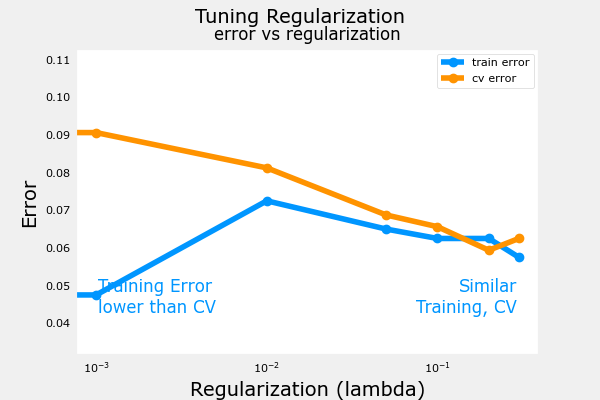

In [37]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

As regularization is increased, the performance of the model on the training and cross-validation data sets converge. For this data set and model, lambda > 0.01 seems to be a reasonable choice.

<a name="7.1"></a>
### 7.1 Test
Let's try our optimized models on the test set and compare them to 'ideal' performance. 

3/3 [==============================] - 0s 3ms/step


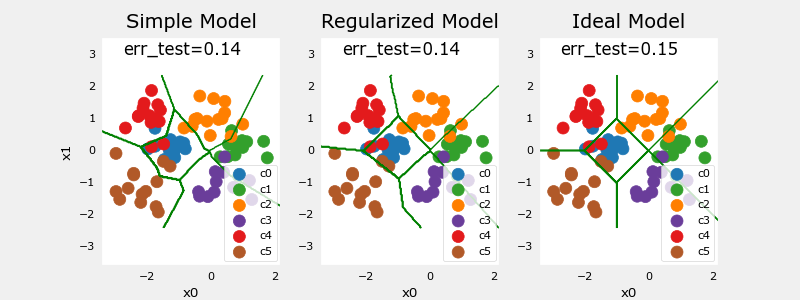

In [38]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)

Our test set is small and seems to have a number of outliers so classification error is high. However, the performance of our optimized models is comparable to ideal performance.

## Congratulations! 
You have become familiar with important tools to apply when evaluating your machine learning models. Namely:  
* splitting data into trained and untrained sets allows you to differentiate between underfitting and overfitting
* creating three data sets, Training, Cross-Validation and Test allows you to
    * train your parameters $W,B$ with the training set
    * tune model parameters such as complexity, regularization and number of examples with the cross-validation set
    * evaluate your 'real world' performance using the test set.
* comparing training vs cross-validation performance provides insight into a model's propensity towards overfitting (high variance) or underfitting (high bias)